<a href="https://colab.research.google.com/github/luutienphat19146233/phan-lo-i-m-n-n-Vi-t-Nam-/blob/main/CNN_monan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:

# Chuyển đến file Google Drive chứa bộ ảnh đã tạo
%cd"/content/drive/MyDrive/BaitapAI/tuan14/Ẩm thực Việt Nam"

/content/drive/MyDrive/BaitapAI/tuan14/Ẩm thực Việt Nam


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/BaitapAI/tuan14/Ẩm thực Việt Nam/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 509 images belonging to 10 classes.


In [ ]:
# Tạo bộ dữ liệu validation set
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/BaitapAI/tuan14/Ẩm thực Việt Nam/validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 100 images belonging to 10 classes.


In [ ]:
#các nhãn có trong bộ dữ liệu train
training_set.class_indices


{'Phở': 0,
 'bánh canh': 1,
 'bánh chưng': 2,
 'bánh mỳ Việt Nam': 3,
 'bánh xèo': 4,
 'bún riêu': 5,
 'bún đậu mắm tôm': 6,
 'cơm lam': 7,
 'lẩu mắm': 8,
 'tiết canh': 9}

In [ ]:
#các nhãn có trong bộ dữ liệu validation
validation.class_indices

{'Phở': 0,
 'bánh canh': 1,
 'bánh chưng': 2,
 'bánh mỳ Việt Nam': 3,
 'bánh xèo': 4,
 'bún riêu': 5,
 'bún đậu mắm tôm': 6,
 'cơm lam': 7,
 'lẩu mắm': 8,
 'tiết canh': 9}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [ ]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)]) # verbose=1 để hiển thị quá trinh học

Epoch 1/100
16/16 [==============================] - 7s 404ms/step - loss: 4.7045 - accuracy: 0.0806 - val_loss: 2.3023 - val_accuracy: 0.1100
Epoch 2/100
16/16 [==============================] - 6s 370ms/step - loss: 2.3046 - accuracy: 0.1002 - val_loss: 2.3025 - val_accuracy: 0.1000
Epoch 3/100
16/16 [==============================] - 6s 373ms/step - loss: 2.3023 - accuracy: 0.1159 - val_loss: 2.3024 - val_accuracy: 0.1000
Epoch 4/100
16/16 [==============================] - 6s 372ms/step - loss: 2.3023 - accuracy: 0.1159 - val_loss: 2.3017 - val_accuracy: 0.0900
Epoch 5/100
16/16 [==============================] - 6s 364ms/step - loss: 2.3033 - accuracy: 0.1297 - val_loss: 2.2999 - val_accuracy: 0.1500
Epoch 6/100
16/16 [==============================] - 6s 371ms/step - loss: 2.3004 - accuracy: 0.1395 - val_loss: 2.2893 - val_accuracy: 0.1500
Epoch 7/100
16/16 [==============================] - 6s 370ms/step - loss: 2.2972 - accuracy: 0.1513 - val_loss: 2.2811 - val_accuracy: 0.1400

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.16550816595554352
Train Accuracy 0.9489194750785828


<function matplotlib.pyplot.show>

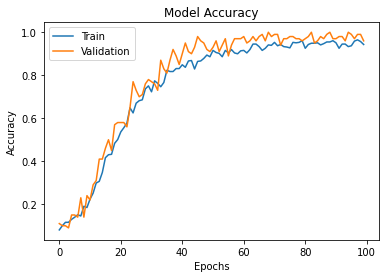

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('Model Accuracy') 
plt.ylabel('Accuracy') 
plt.xlabel('Epochs') 
plt.legend(['Train','Validation']) 
plt.show 

In [ ]:
# Lưu lại
model.save("Save.h5") 
model_CNN=load_model('Save.h5') 



bánh mỳ Việt Nam


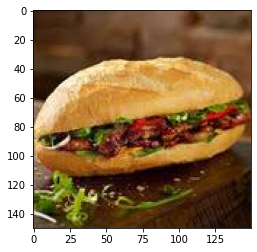

In [ ]:
mg=load_img('/content/images (3).jpg',target_size=(150,150)) ##
plt.imshow(img) 
import numpy as np 
img=img_to_array(img) 
#img=img.reshape(1,150,150,3)
img=img.astype('float32') 
img=img/255
img=np.expand_dims(img,axis=0) 
result=model_CNN.predict(img) 
if round(result[0][0])==1: 
 prediction='Phở'
elif round(result[0][1])==1: 
 prediction='bánh canh'
elif round(result[0][2])==1: 
 prediction='bánh chưng'
elif round(result[0][3])==1: 
 prediction='bánh mỳ Việt Nam'
elif round(result[0][4])==1: 
 prediction='bánh xèo'
elif round(result[0][5])==1: 
 prediction='bún riêu'
elif round(result[0][6])==1: 
 prediction='bún đậu mắm tôm'
elif round(result[0][7])==1: 
 prediction='cơm lam'
elif round(result[0][8])==1: 
 prediction='lẩu mắm'
elif round(result[0][9])==1: 
 prediction='tiết canh'
print(prediction)i

In [ ]:
url='/content/xeo (2).jpg'
img=load_img(url,target_size=(150,150))
plt.imshow(load_img(url))
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255
print(name[np.argmax(model.predict(img))])